<a href="https://colab.research.google.com/github/samikshagadhave/binary_classification/blob/main/efficientnetB6_by_image_processing_method_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive

/content/gdrive


In [ ]:
import pandas as pd

df=pd.read_excel(r'/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Train 1.xlsx')

df['OR_Gate']=df['Tower']|df['Transmission line']|df['insulator']|df['vibration damper']
#print(df['OR_Gate'])

Bad_dataset=list(df[df['OR_Gate']==0]["Image Name"])
#print(Bad_dataset)

Good_dataset=list(df[df['OR_Gate']==1]["Image Name"])
#print(Good_dataset)
path=r"/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/train/"

img_path_Bad_dataset=r"/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Train/bad_dataset/"

img_path_Good_dataset =r"/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Train/good_dataset/"
import shutil
for i in Bad_dataset:
   src_path=path+i
   #print(src_path)
   dest_path=img_path_Bad_dataset+i
   #print(dest_path)
   temp=shutil.copy(src_path,dest_path)
   #print(temp)
   print("bad_dataset folder created and relevant images have been moved")
for i in Good_dataset:
   src_path=path+i
   #print(src_path)
   dest_path=img_path_Good_dataset+i
   #print(dest_path)
   temp=shutil.copy(src_path, dest_path)
   print("good_dataset folder created and relevant images have been moved")


df=pd.read_excel(r'/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test 1.xlsx')

df['OR_Gate']=df['Tower']|df['Transmission line']|df['insulator']|df['vibration damper']
#print(df['OR_Gate'])

Bad_dataset=list(df[df['OR_Gate']==0]["Image Name"])
Good_dataset=list(df[df['OR_Gate']==1]["Image Name"])
#print(Good_dataset)
path=r"/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/test/"

img_path_Bad_dataset=r"/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/"
img_path_Good_dataset =r"/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/"
import shutil
for i in Bad_dataset:
   src_path=path+i
   #print(src_path)
   dest_path=img_path_Bad_dataset+i
   #print(dest_path)
   temp=shutil.copy(src_path,dest_path)
   #print(temp)
   print("bad_dataset folder created and relevant images have been moved")
for i in Good_dataset:
   src_path=path+i
   #print(src_path)
   dest_path=img_path_Good_dataset+i
   #print(dest_path)
   temp=shutil.copy(src_path, dest_path)
   print("good_dataset folder created and relevant images have been moved")


bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have bee

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,Conv2D,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

train_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Train',
    labels='inferred',
    label_mode='int',
    batch_size=4,
    image_size=(528,528)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test',
    labels='inferred',
    label_mode='int',
    batch_size=4,
    image_size=(528,528)
)
print(train_ds)
print(validation_ds)



Found 198 files belonging to 2 classes.
Found 86 files belonging to 2 classes.
<_BatchDataset element_spec=(TensorSpec(shape=(None, 528, 528, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 528, 528, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
def process(image,label):
   image=tf.cast(image/255.,tf.float32)
   return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
from tensorflow.keras.applications import EfficientNetB6
model=EfficientNetB6(weights='imagenet',include_top=False,input_shape=(528,528,3))
my_model=Sequential([model,
                     Conv2D(1024,3,1,activation='relu'),
                     GlobalAveragePooling2D(),
                     Dense(1024,activation='relu'),
                     Dropout(0.2),
                     Dense(1024,activation='relu'),
                     Dropout(0.2),
                     Dense(1,activation='sigmoid'),
                     ])
my_model.summary()

165234480/165234480 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb6 (Functional)  (None, 17, 17, 2304)     40960143  
                                                                 
 conv2d (Conv2D)             (None, 15, 15, 1024)      21234688  
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import metrics
metrics=['accuracy']
my_model.compile(loss=BinaryCrossentropy(),optimizer=Adam(learning_rate=0.001),metrics=metrics)

In [ ]:
history=my_model.fit(train_ds,epochs=30,validation_data=validation_ds)

Epoch 1/30
10/50 [=====>........................] - ETA: 37s - loss: 0.0788 - accuracy: 0.9750

KeyboardInterrupt: ignored

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0066.jpg')
print(type(image))
print(image.mode)
print(image.format)
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
RGB
JPEG
1/1 [==============================] - 5s 5s/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0108.jpg')
print(type(image))
print(image.mode)
print(image.format)
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
RGB
JPEG
1/1 [==============================] - 0s 68ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0110.jpg')
print(type(image))
print(image.mode)
print(image.format)
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
RGB
JPEG
1/1 [==============================] - 0s 61ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0489.jpg')
print(type(image))
print(image.mode)
print(image.format)
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
RGB
JPEG
1/1 [==============================] - 0s 73ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0491.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 211ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0493.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 65ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0495.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 75ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0497.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 63ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0499.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 133ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0501.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 147ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0503.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 81ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0505.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 118ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0507.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 55ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0509.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 55ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0608.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 49ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0610.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 66ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0976.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 39ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0978.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 44ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0980.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 56ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0982.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 47ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0984.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 39ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0986.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 40ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0869.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 59ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0871.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 42ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0873.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 46ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0875.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 38ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0877.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 38ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0879.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 40ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0881.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 38ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0883.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 55ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0885.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 39ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0887.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 48ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0889.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 57ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0891.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 36ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0893.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 63ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0895.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 37ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0897.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 37ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0899.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 62ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0901.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 38ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0903.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 42ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0905.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 36ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0907.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 37ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0909.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 44ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0911.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 82ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0913.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 44ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0915.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 41ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0917.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 39ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0919.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 41ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0921.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 45ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0923.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 36ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0925.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 38ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0927.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 62ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0929.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 37ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0931.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 41ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0933.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 36ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0935.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 62ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0937.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 37ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0939.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 36ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0941.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 60ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0943.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 36ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0945.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 38ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0947.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 38ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0949.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 56ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0951.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 37ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0953.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 39ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0955.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 42ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0957.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 69ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0959.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 36ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0961.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 38ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0963.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 39ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0965.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 37ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0967.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 39ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0969.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 40ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0971.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 39ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0973.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 36ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0975.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 52ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0977.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 52ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0979.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 36ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0981.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 37ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0983.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 55ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0985.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 37ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0987.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 36ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0989.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 40ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0991.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 38ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0993.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 53ms/step
[[1.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0995.jpg')
image_resized=image.resize((528,528))
image=np.expand_dims(image_resized,axis=0)
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 0s 37ms/step
[[1.]]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
truth=['bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good']
prediction=['good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good']
print(classification_report(truth,prediction))
print(confusion_matrix(truth,prediction))

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        22
        good       0.74      1.00      0.85        64

    accuracy                           0.74        86
   macro avg       0.37      0.50      0.43        86
weighted avg       0.55      0.74      0.64        86

[[ 0 22]
 [ 0 64]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 image DJI_0066.jpg is not detected by efficientnetB6 model because brightness is poor, so we can apply resizing+brightness combination.



(528, 528, 3)
(1, 528, 528, 3)
1/1 [==============================] - 6s 6s/step
[[1.]]


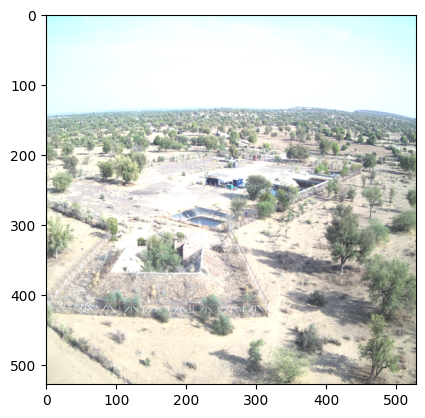

In [ ]:
from PIL import ImageEnhance
from PIL import Image
import numpy as np

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import imagenet_utils
img=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0066.jpg')
img_resize=img.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
curr_bri=ImageEnhance.Brightness(img_resize)
new_bri=1.6
img_brightened=curr_bri.enhance(new_bri)
plt.imshow(img_brightened)
image =img_to_array(img_brightened)
print(image.shape)
img1 = np.expand_dims(image,axis=0)
print(img1.shape)
#from copy import deepcopy
#img_2=deepcopy(img1)
#images=[img1,img_2]
prediction=my_model.predict(img1)
print(prediction)


before image proceesing bad image predict good,
after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

image DJI_0108.jpg is not detected by efficientnetB6 model because brightness is poor, so we can apply resizing+brightness combination.




1/1 [==============================] - 0s 67ms/step
[[1.]]


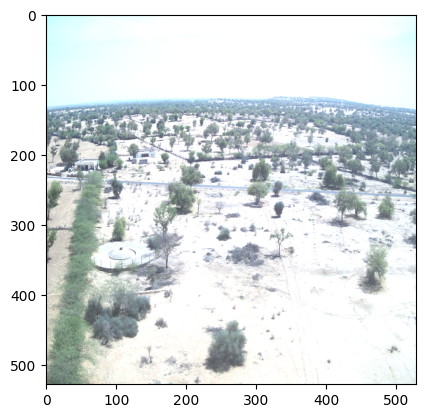

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0108.jpg')
img_resize=image.resize((528,528))

curr_bri=ImageEnhance.Brightness(img_resize)
new_bri=1.6
img_brightened=curr_bri.enhance(new_bri)
plt.imshow(img_brightened)
img = img_to_array(img_brightened)
img = img.reshape(1,528,528,3)

pred=my_model.predict(img)
print(pred)
#pred==1


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

image DJI_0110.jpg is not detected by efficientnetB6 model because brightness is poor, so we can apply resizing+brightness combination.

1/1 [==============================] - 0s 66ms/step
[[1.]]


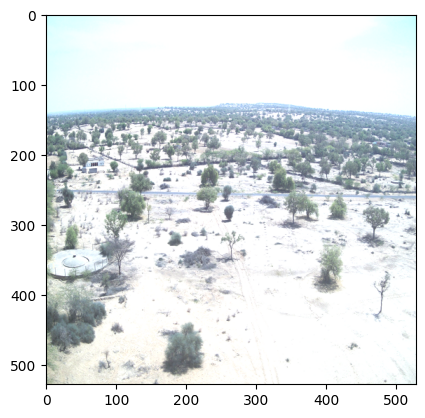

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0110.jpg')
img_resize=image.resize((528,528))

curr_bri=ImageEnhance.Brightness(img_resize)
new_bri=1.6
img_brightened=curr_bri.enhance(new_bri)
plt.imshow(img_brightened)
img = img_to_array(img_brightened)
img = img.reshape(1,528,528,3)

pred=my_model.predict(img)
print(pred)


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

image DJI_0489.jpg is not detected by efficientnetB6 model because brightness is poor, so we can apply resizing+brightness combination.

1/1 [==============================] - 0s 93ms/step
[[1.]]


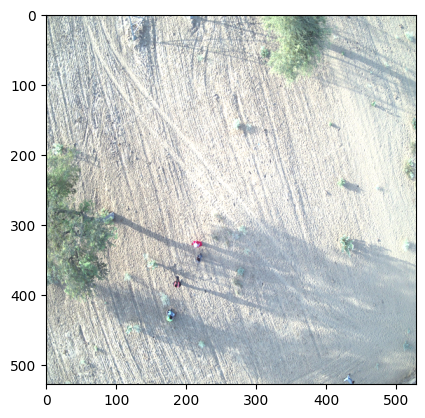

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0489.jpg')
img_resize=image.resize((528,528))

curr_bri=ImageEnhance.Brightness(img_resize)
new_bri=1.6
img_brightened=curr_bri.enhance(new_bri)
plt.imshow(img_brightened)
img = img_to_array(img_brightened)
img = img.reshape(1,528,528,3)

pred=my_model.predict(img)
print(pred)


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

image DJI_0491.jpg is not detected by efficientnetB6 model because brightness is poor, so we can apply resizing+brightness combination.

1/1 [==============================] - 0s 78ms/step
[[1.]]


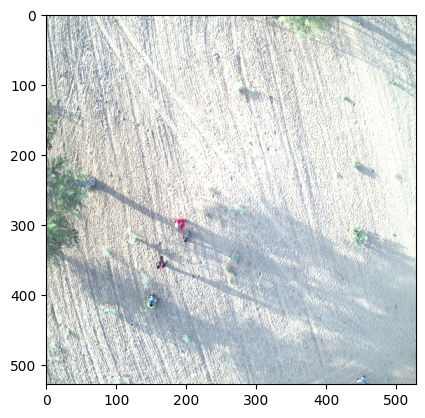

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0491.jpg')
img_resize=image.resize((528,528))

curr_bri=ImageEnhance.Brightness(img_resize)
new_bri=1.6
img_brightened=curr_bri.enhance(new_bri)
plt.imshow(img_brightened)
img = img_to_array(img_brightened)
img = img.reshape(1,528,528,3)


pred=my_model.predict(img)
print(pred)


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

image DJI_0493.jpg is not detected by efficientnetB6 model because brightness is poor, so we can apply resizing+brightness combination.

1/1 [==============================] - 0s 218ms/step
[[1.]]


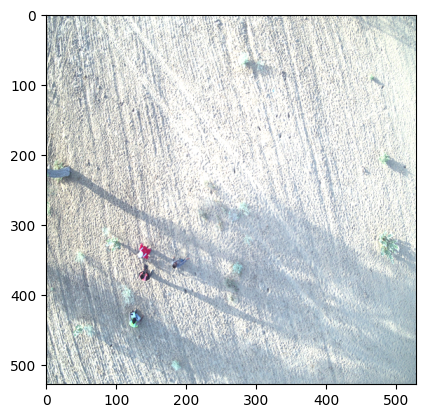

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0493.jpg')
img_resize=image.resize((528,528))

curr_bri=ImageEnhance.Brightness(img_resize)
new_bri=1.6
img_brightened=curr_bri.enhance(new_bri)
plt.imshow(img_brightened)
img = img_to_array(img_brightened)
img = img.reshape(1,528,528,3)

pred=my_model.predict(img)
print(pred)


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

image DJI_0495.jpg is not detected by efficientnetB6 model because brightness is poor, so we can apply resizing+brightness combination.

1/1 [==============================] - 0s 141ms/step
[[1.]]


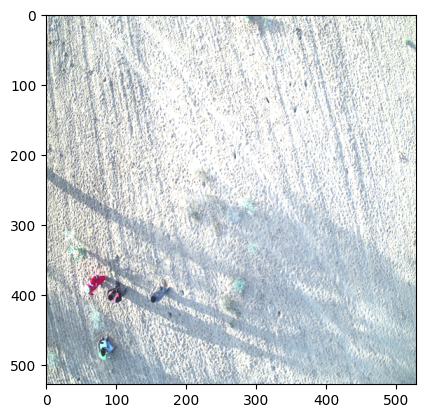

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0495.jpg')
img_resize=image.resize((528,528))

curr_bri=ImageEnhance.Brightness(img_resize)
new_bri=1.6
img_brightened=curr_bri.enhance(new_bri)
plt.imshow(img_brightened)
img = img_to_array(img_brightened)
img = img.reshape(1,528,528,3)


pred=my_model.predict(img)
print(pred)


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

image DJI_0497.jpg is not detected by efficientnetB6 model because brightness is poor, so we can apply resizing+brightness combination.

1/1 [==============================] - 0s 67ms/step
[[1.]]


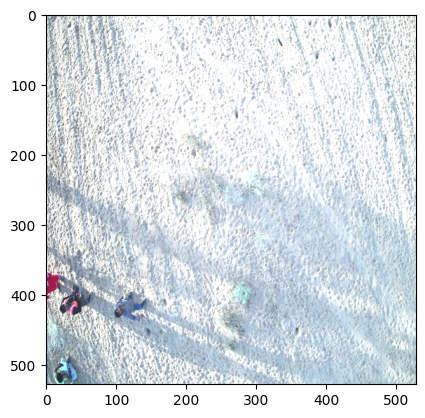

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0497.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
curr_bri=ImageEnhance.Brightness(img_resize)
new_bri=1.6
img_brightened=curr_bri.enhance(new_bri)
plt.imshow(img_brightened)

img = img_to_array(img_brightened)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

image DJI_0499.jpg is not detected by efficientnetB6 model because brightness is poor, so we can apply resizing+brightness combination.

1/1 [==============================] - 0s 64ms/step
[[1.]]


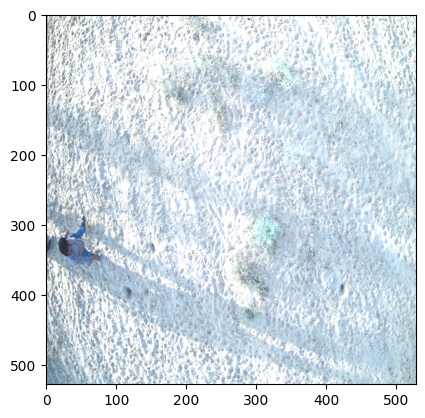

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0499.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
curr_bri=ImageEnhance.Brightness(img_resize)
new_bri=1.6
img_brightened=curr_bri.enhance(new_bri)
plt.imshow(img_brightened)
img = img_to_array(img_brightened)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

image DJI_0501.jpg is not detected by efficientnetB6 model because brightness is poor, so we can apply resizing+brightness combination.

1/1 [==============================] - 0s 63ms/step
[[1.]]


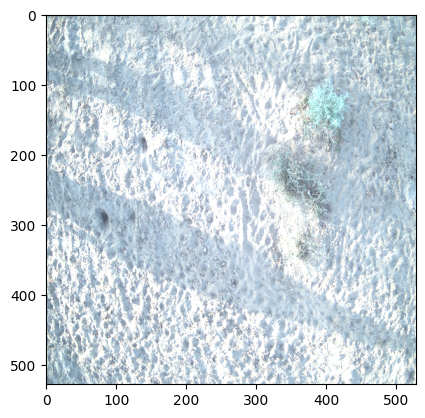

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0501.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
curr_bri=ImageEnhance.Brightness(img_resize)
new_bri=1.6
img_brightened=curr_bri.enhance(new_bri)
plt.imshow(img_brightened)
img = img_to_array(img_brightened)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

image DJI_0503.jpg is not detected by efficientnetB6 model because brightness is poor, so we can apply resizing+brightness combination.

1/1 [==============================] - 0s 61ms/step
[[1.]]


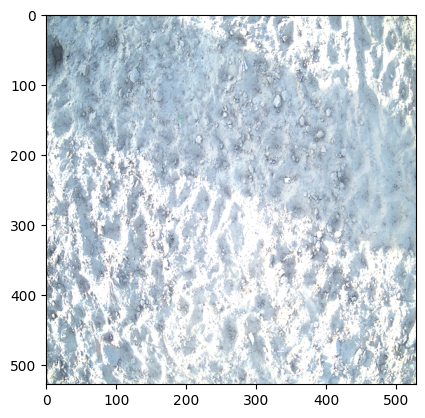

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0503.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
curr_bri=ImageEnhance.Brightness(img_resize)
new_bri=1.6
img_brightened=curr_bri.enhance(new_bri)
plt.imshow(img_brightened)
img = img_to_array(img_brightened)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

image DJI_0505.jpg is not detected by efficientnetB6 model because brightness is poor, so we can apply resizing+brightness combination.

1/1 [==============================] - 0s 66ms/step
[[1.]]


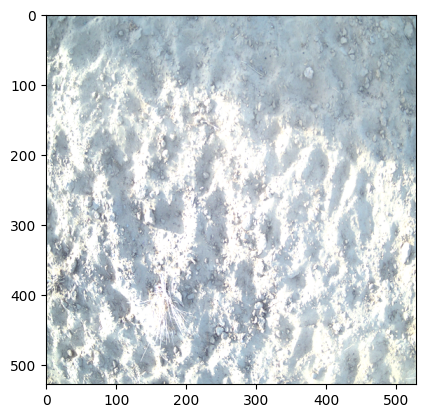

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0505.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
curr_bri=ImageEnhance.Brightness(img_resize)
new_bri=1.6
img_brightened=curr_bri.enhance(new_bri)
img = img_to_array(img_brightened)
plt.imshow(img_brightened)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

image DJI_0507.jpg is not detected by efficientnetB6 model because brightness is poor, so we can apply resizing+brightness combination.

1/1 [==============================] - 0s 62ms/step
[[1.]]


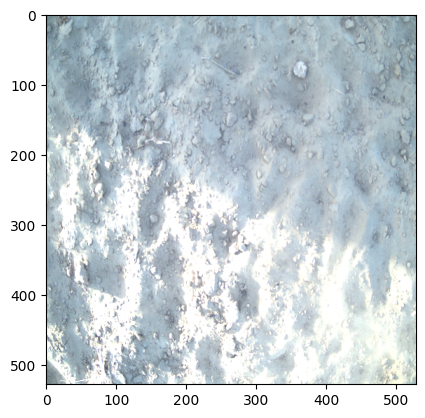

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0507.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
curr_bri=ImageEnhance.Brightness(img_resize)
new_bri=1.6
img_brightened=curr_bri.enhance(new_bri)
plt.imshow(img_brightened)
img = img_to_array(img_brightened)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

image DJI_0509.jpg is not detected by efficientnetB6 model because brightness is poor, so we can apply resizing+brightness combination.

1/1 [==============================] - 0s 72ms/step
[[1.]]


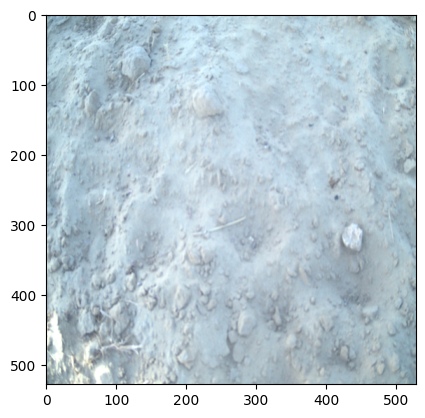

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0509.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
curr_bri=ImageEnhance.Brightness(img_resize)
new_bri=1.6
img_brightened=curr_bri.enhance(new_bri)
plt.imshow(img_brightened)
img = img_to_array(img_brightened)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

image DJI_0608.jpg is not detected by efficientnetB6 model because brightness is poor, so we can apply resizing+brightness combination.

1/1 [==============================] - 0s 81ms/step
[[1.]]


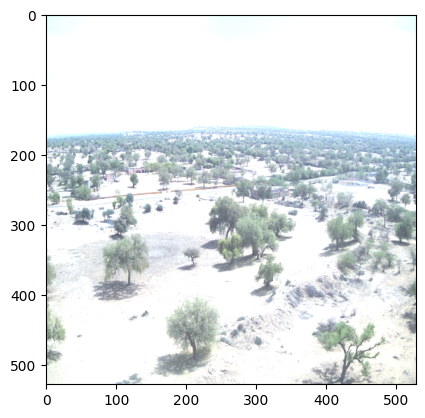

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0608.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
curr_bri=ImageEnhance.Brightness(img_resize)
new_bri=1.6
img_brightened=curr_bri.enhance(new_bri)
plt.imshow(img_brightened)
img = img_to_array(img_brightened)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

image DJI_0610.jpg is not detected by efficientnetB6 model because brightness is poor, so we can apply resizing+brightness combination.

1/1 [==============================] - 0s 58ms/step
[[1.]]


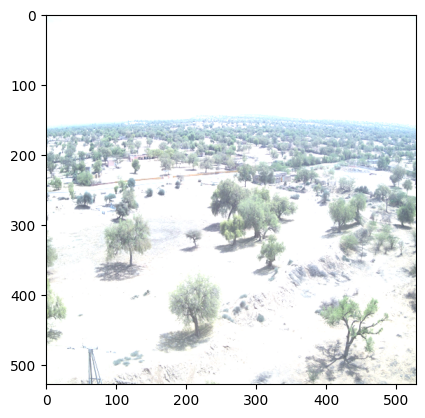

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0610.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
curr_bri=ImageEnhance.Brightness(img_resize)
new_bri=1.6
img_brightened=curr_bri.enhance(new_bri)
plt.imshow(img_brightened)
img = img_to_array(img_brightened)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

image DJI_0976.jpg is not detected by efficientnetB6 model because brightness is poor, so we can apply resizing+brightness combination.



1/1 [==============================] - 0s 130ms/step
[[1.]]


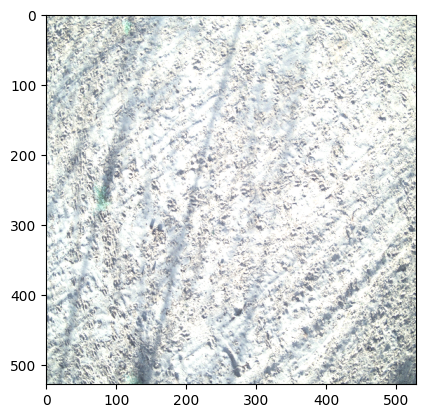

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0976.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
curr_bri=ImageEnhance.Brightness(img_resize)
new_bri=1.6
img_brightened=curr_bri.enhance(new_bri)
plt.imshow(img_brightened)
img = img_to_array(img_brightened)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

image DJI_0978.jpg is not detected by efficientnetB6 model because brightness is poor, so we can apply resizing+brightness combination.



1/1 [==============================] - 0s 66ms/step
[[1.]]


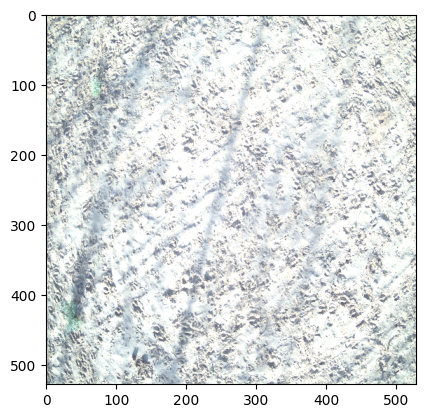

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0978.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
curr_bri=ImageEnhance.Brightness(img_resize)
new_bri=1.6
img_brightened=curr_bri.enhance(new_bri)
plt.imshow(img_brightened)
img = img_to_array(img_brightened)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

image DJI_0980.jpg is not detected by efficientnetB6 model because brightness is poor, so we can apply resizing+brightness combination.



1/1 [==============================] - 0s 90ms/step
[[1.]]


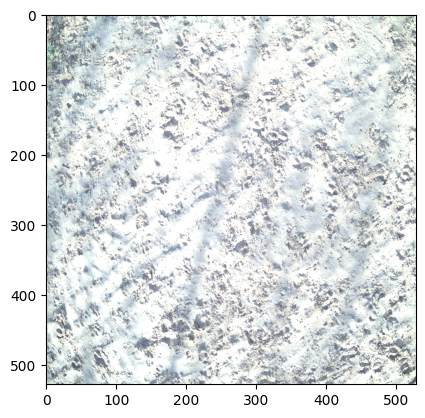

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0980.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
curr_bri=ImageEnhance.Brightness(img_resize)
new_bri=1.6
img_brightened=curr_bri.enhance(new_bri)
plt.imshow(img_brightened)
img = img_to_array(img_brightened)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

image DJI_0982.jpg is not detected by efficientnetB6 model because brightness is poor, so we can apply resizing+brightness combination.



1/1 [==============================] - 0s 62ms/step
[[1.]]


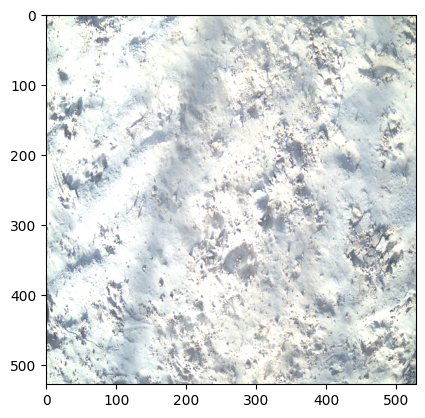

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0982.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
curr_bri=ImageEnhance.Brightness(img_resize)
new_bri=1.6
img_brightened=curr_bri.enhance(new_bri)
plt.imshow(img_brightened)
img = img_to_array(img_brightened)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

image DJI_0984.jpg is not detected by efficientnetB6 model because brightness is poor, so we can apply resizing+brightness combination.



1/1 [==============================] - 0s 62ms/step
[[1.]]


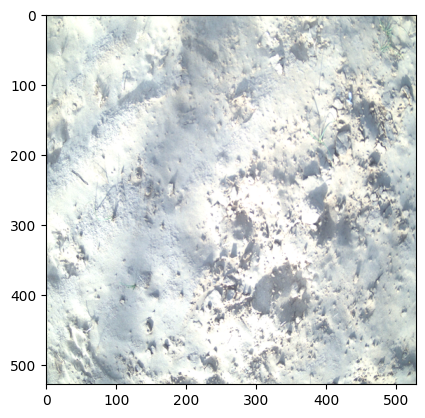

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0984.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
curr_bri=ImageEnhance.Brightness(img_resize)
new_bri=1.6
img_brightened=curr_bri.enhance(new_bri)
plt.imshow(img_brightened)
img = img_to_array(img_brightened)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

image DJI_0986.jpg is not detected by efficientnetB6 model because brightness is poor, so we can apply resizing+brightness combination.



1/1 [==============================] - 0s 143ms/step
[[1.]]


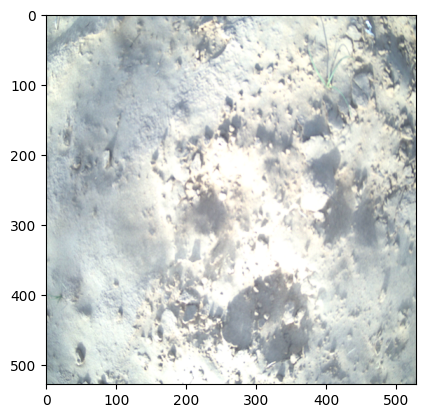

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0986.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
curr_bri=ImageEnhance.Brightness(img_resize)
new_bri=1.6
img_brightened=curr_bri.enhance(new_bri)
plt.imshow(img_brightened)
img = img_to_array(img_brightened)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)



before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
truth=['bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good']
prediction=['good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good']
print(classification_report(truth,prediction))
print(confusion_matrix(truth,prediction))

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        22
        good       0.74      1.00      0.85        64

    accuracy                           0.74        86
   macro avg       0.37      0.50      0.43        86
weighted avg       0.55      0.74      0.64        86

[[ 0 22]
 [ 0 64]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Image DJI_0066.jpg is not detected by efficientnetB6  ,so we apply medianfilter to the image


In [ ]:
from PIL import Image
from PIL import ImageFilter
from PIL.ImageFilter import MedianFilter
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0066.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
image_medianblur=img_resize.filter(ImageFilter.MedianFilter(size=3))
img = img_to_array(image_medianblur)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)


1/1 [==============================] - 0s 57ms/step
[[1.]]


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

Image DJI_0108.jpg is not detected by efficientnetB6 ,so we apply medianfilter to the image

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0108.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
image_medianblur=img_resize.filter(ImageFilter.MedianFilter(size=3))
img = img_to_array(image_medianblur)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)

1/1 [==============================] - 0s 108ms/step
[[1.]]


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

Image DJI_0110.jpg is not detected by efficientnetB6  ,so we apply medianfilter to the image

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0110.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
image_medianblur=img_resize.filter(ImageFilter.MedianFilter(size=3))
img = img_to_array(image_medianblur)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)

1/1 [==============================] - 0s 76ms/step
[[1.]]


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

Image DJI_0489.jpg is not detected by efficientnetB6  ,so we apply medianfilter to the image

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0489.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
image_medianblur=img_resize.filter(ImageFilter.MedianFilter(size=3))
img = img_to_array(image_medianblur)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)

1/1 [==============================] - 0s 115ms/step
[[1.]]


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

Image DJI_0491.jpg is not detected by efficientnetB6 ,so we apply medianfilter to the image

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0491.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
image_medianblur=img_resize.filter(ImageFilter.MedianFilter(size=3))
img = img_to_array(image_medianblur)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)


1/1 [==============================] - 0s 110ms/step
[[1.]]


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

Image DJI_0493.jpg is not detected by efficientnetB6  ,so we apply medianfilter to the image

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0493.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
image_medianblur=img_resize.filter(ImageFilter.MedianFilter(size=3))
img = img_to_array(image_medianblur)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)


1/1 [==============================] - 0s 63ms/step
[[1.]]


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

Image DJI_0495.jpg is not detected by efficientnetB6  ,so we apply medianfilter to the image

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0495.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
image_medianblur=img_resize.filter(ImageFilter.MedianFilter(size=3))
img = img_to_array(image_medianblur)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)

1/1 [==============================] - 0s 64ms/step
[[1.]]


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

Image DJI_0497.jpg is not detected by efficientnetB6  ,so we apply medianfilter to the image

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0497.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
image_medianblur=img_resize.filter(ImageFilter.MedianFilter(size=3))
img = img_to_array(image_medianblur)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)

1/1 [==============================] - 0s 118ms/step
[[1.]]


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

Image DJI_0499.jpg is not detected by efficientnetB6 ,so we apply medianfilter to the image.

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0499.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
image_medianblur=img_resize.filter(ImageFilter.MedianFilter(size=3))
img = img_to_array(image_medianblur)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)


1/1 [==============================] - 0s 57ms/step
[[1.]]


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

Image DJI_0501.jpg is not detected by efficientnetB6  ,so we apply medianfilter to the image

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0501.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
image_medianblur=img_resize.filter(ImageFilter.MedianFilter(size=3))
img = img_to_array(image_medianblur)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)


1/1 [==============================] - 0s 59ms/step
[[1.]]


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

Image DJI_0503.jpg is not detected by efficientnetB6 because contrast is poor ,so we apply medianfilter to the image

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0503.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
image_medianblur=img_resize.filter(ImageFilter.MedianFilter(size=3))
img = img_to_array(image_medianblur)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)


1/1 [==============================] - 0s 168ms/step
[[1.]]


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

Image DJI_0505.jpg is not detected by efficientnetB6  ,so we apply medianfilter to the image

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0505.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
image_medianblur=img_resize.filter(ImageFilter.MedianFilter(size=3))
img = img_to_array(image_medianblur)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)


1/1 [==============================] - 0s 58ms/step
[[1.]]


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

Image DJI_0507.jpg is not detected by efficientnetB6  ,so we apply medianfilter to the image

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0507.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
image_medianblur=img_resize.filter(ImageFilter.MedianFilter(size=3))
img = img_to_array(image_medianblur)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)


1/1 [==============================] - 0s 57ms/step
[[1.]]


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

Image DJI_0509.jpg is not detected by efficientnetB6  ,so we apply medianfilter to the image

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0509.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
image_medianblur=img_resize.filter(ImageFilter.MedianFilter(size=3))
img = img_to_array(image_medianblur)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)

1/1 [==============================] - 0s 58ms/step
[[1.]]


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

Image DJI_0608.jpg is not detected by efficientnetB6  ,so we apply medianfilter to the image

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0608.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
image_medianblur=img_resize.filter(ImageFilter.MedianFilter(size=3))
img = img_to_array(image_medianblur)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)


1/1 [==============================] - 0s 58ms/step
[[1.]]


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

Image DJI_0610.jpg is not detected by efficientnetB6  ,so we apply medianfilter to the image

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0610.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
image_medianblur=img_resize.filter(ImageFilter.MedianFilter(size=3))
img = img_to_array(image_medianblur)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)


1/1 [==============================] - 0s 95ms/step
[[1.]]


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

Image DJI_0976.jpg is not detected by efficientnetB6  ,so we apply medianfilter to the image

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0976.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
image_medianblur=img_resize.filter(ImageFilter.MedianFilter(size=3))
img = img_to_array(image_medianblur)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)


1/1 [==============================] - 0s 63ms/step
[[1.]]


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

Image DJI_0978.jpg is not detected by efficientnetB6 ,so we apply medianfilter to the image

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0978.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
image_medianblur=img_resize.filter(ImageFilter.MedianFilter(size=3))
img = img_to_array(image_medianblur)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)


1/1 [==============================] - 0s 54ms/step
[[1.]]


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

Image DJI_0980.jpg is not detected by efficientnetB6  ,so we apply medianfilter to the image

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0980.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
image_medianblur=img_resize.filter(ImageFilter.MedianFilter(size=3))
img = img_to_array(image_medianblur)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)


1/1 [==============================] - 0s 93ms/step
[[1.]]


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

Image DJI_0982.jpg is not detected by efficientnetB6  ,so we apply medianfilter to the image

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0982.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
image_medianblur=img_resize.filter(ImageFilter.MedianFilter(size=3))
img = img_to_array(image_medianblur)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)

1/1 [==============================] - 0s 126ms/step
[[1.]]


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

Image DJI_0984.jpg is not detected by efficientnetB6 ,so we apply medianfilter to the image

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0984.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
image_medianblur=img_resize.filter(ImageFilter.MedianFilter(size=3))
img = img_to_array(image_medianblur)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)

1/1 [==============================] - 0s 80ms/step
[[1.]]


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

Image DJI_0986.jpg is not detected by efficientnetB ,so we apply medianfilter to the image

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
image=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0986.jpg')
img_resize=image.resize((528,528))
#plt.imshow(img_resize,cmap='gray')
image_medianblur=img_resize.filter(ImageFilter.MedianFilter(size=3))
img = img_to_array(image_medianblur)
img = img.reshape(1,528,528,3)
#print(img.shape)
#display(img_brightened)
pred=my_model.predict(img)
print(pred)

1/1 [==============================] - 0s 64ms/step
[[1.]]


before image proceesing bad image predict good, after image proceesing bad image predict good. so this image proceesing method can not predict correctly.

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
truth=['bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good']
prediction=['good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good']
print(classification_report(truth,prediction))
print(confusion_matrix(truth,prediction))

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        22
        good       0.74      1.00      0.85        64

    accuracy                           0.74        86
   macro avg       0.37      0.50      0.43        86
weighted avg       0.55      0.74      0.64        86

[[ 0 22]
 [ 0 64]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


now apply resizing+bilinear operation

In [ ]:
from PIL import ImageEnhance
from PIL import Image
from PIL.Image import BILINEAR
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0066.jpg')
newsize=(528,528)
img_resize=img.resize(newsize,Image.BILINEAR)
image =img_to_array(img_resize)
print(image.shape)
img1 = np.expand_dims(image,axis=0)
print(img1.shape)
prediction=my_model.predict(img1)
print(prediction)



(528, 528, 3)
(1, 528, 528, 3)
1/1 [==============================] - 7s 7s/step
[[0.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from PIL.Image import BILINEAR
img=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0108.jpg')
newsize=(528,528)
img_resize=img.resize(newsize,Image.BILINEAR)
image =img_to_array(img_resize)
print(image.shape)
img1 = np.expand_dims(image,axis=0)
print(img1.shape)
prediction=my_model.predict(img1)
print(prediction)



(528, 528, 3)
(1, 528, 528, 3)
1/1 [==============================] - 0s 143ms/step
[[0.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from PIL.Image import BILINEAR
img=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0110.jpg')
newsize=(528,528)
img_resize=img.resize(newsize,Image.BILINEAR)
image =img_to_array(img_resize)
print(image.shape)
img1 = np.expand_dims(image,axis=0)
print(img1.shape)
prediction=my_model.predict(img1)
print(prediction)



(528, 528, 3)
(1, 528, 528, 3)
1/1 [==============================] - 0s 114ms/step
[[0.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from PIL.Image import BILINEAR
img=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0489.jpg')
newsize=(528,528)
img_resize=img.resize(newsize,Image.BILINEAR)
image =img_to_array(img_resize)
print(image.shape)
img1 = np.expand_dims(image,axis=0)
print(img1.shape)
prediction=my_model.predict(img1)
print(prediction)



(528, 528, 3)
(1, 528, 528, 3)
1/1 [==============================] - 0s 149ms/step
[[0.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from PIL.Image import BILINEAR
img=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0491.jpg')
newsize=(528,528)
img_resize=img.resize(newsize,Image.BILINEAR)
image =img_to_array(img_resize)
print(image.shape)
img1 = np.expand_dims(image,axis=0)
print(img1.shape)
prediction=my_model.predict(img1)
print(prediction)



(528, 528, 3)
(1, 528, 528, 3)
1/1 [==============================] - 0s 117ms/step
[[0.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from PIL.Image import BILINEAR
img=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0493.jpg')
newsize=(528,528)
img_resize=img.resize(newsize,Image.BILINEAR)
image =img_to_array(img_resize)
print(image.shape)
img1 = np.expand_dims(image,axis=0)
print(img1.shape)
prediction=my_model.predict(img1)
print(prediction)



(528, 528, 3)
(1, 528, 528, 3)
1/1 [==============================] - 0s 71ms/step
[[0.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from PIL.Image import BILINEAR
img=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0495.jpg')
newsize=(528,528)
img_resize=img.resize(newsize,Image.BILINEAR)
image =img_to_array(img_resize)
print(image.shape)
img1 = np.expand_dims(image,axis=0)
print(img1.shape)
prediction=my_model.predict(img1)
print(prediction)



(528, 528, 3)
(1, 528, 528, 3)
1/1 [==============================] - 0s 57ms/step
[[0.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from PIL.Image import BILINEAR
img=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0497.jpg')
newsize=(528,528)
img_resize=img.resize(newsize,Image.BILINEAR)
image =img_to_array(img_resize)
print(image.shape)
img1 = np.expand_dims(image,axis=0)
print(img1.shape)
prediction=my_model.predict(img1)
print(prediction)



(528, 528, 3)
(1, 528, 528, 3)
1/1 [==============================] - 0s 231ms/step
[[0.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from PIL.Image import BILINEAR
img=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0499.jpg')
newsize=(528,528)
img_resize=img.resize(newsize,Image.BILINEAR)
image =img_to_array(img_resize)
print(image.shape)
img1 = np.expand_dims(image,axis=0)
print(img1.shape)
prediction=my_model.predict(img1)
print(prediction)



(528, 528, 3)
(1, 528, 528, 3)
1/1 [==============================] - 0s 88ms/step
[[0.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from PIL.Image import BILINEAR
img=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0501.jpg')
newsize=(528,528)
img_resize=img.resize(newsize,Image.BILINEAR)
image =img_to_array(img_resize)
print(image.shape)
img1 = np.expand_dims(image,axis=0)
print(img1.shape)
prediction=my_model.predict(img1)
print(prediction)



(528, 528, 3)
(1, 528, 528, 3)
1/1 [==============================] - 0s 110ms/step
[[0.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from PIL.Image import BILINEAR
img=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0503.jpg')
newsize=(528,528)
img_resize=img.resize(newsize,Image.BILINEAR)
image =img_to_array(img_resize)
print(image.shape)
img1 = np.expand_dims(image,axis=0)
print(img1.shape)
prediction=my_model.predict(img1)
print(prediction)



(528, 528, 3)
(1, 528, 528, 3)
1/1 [==============================] - 0s 168ms/step
[[0.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from PIL.Image import BILINEAR
img=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0505.jpg')
newsize=(528,528)
img_resize=img.resize(newsize,Image.BILINEAR)
image =img_to_array(img_resize)
print(image.shape)
img1 = np.expand_dims(image,axis=0)
print(img1.shape)
prediction=my_model.predict(img1)
print(prediction)



(528, 528, 3)
(1, 528, 528, 3)
1/1 [==============================] - 0s 118ms/step
[[0.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from PIL.Image import BILINEAR
img=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0507.jpg')
newsize=(528,528)
img_resize=img.resize(newsize,Image.BILINEAR)
image =img_to_array(img_resize)
print(image.shape)
img1 = np.expand_dims(image,axis=0)
print(img1.shape)
prediction=my_model.predict(img1)
print(prediction)



(528, 528, 3)
(1, 528, 528, 3)
1/1 [==============================] - 0s 133ms/step
[[0.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from PIL.Image import BILINEAR
img=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0509.jpg')
newsize=(528,528)
img_resize=img.resize(newsize,Image.BILINEAR)
image =img_to_array(img_resize)
print(image.shape)
img1 = np.expand_dims(image,axis=0)
print(img1.shape)
prediction=my_model.predict(img1)
print(prediction)



(528, 528, 3)
(1, 528, 528, 3)
1/1 [==============================] - 0s 119ms/step
[[0.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from PIL.Image import BILINEAR
img=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0608.jpg')
newsize=(528,528)
img_resize=img.resize(newsize,Image.BILINEAR)
image =img_to_array(img_resize)
print(image.shape)
img1 = np.expand_dims(image,axis=0)
print(img1.shape)
prediction=my_model.predict(img1)
print(prediction)



(528, 528, 3)
(1, 528, 528, 3)
1/1 [==============================] - 0s 53ms/step
[[0.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from PIL.Image import BILINEAR
img=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0610.jpg')
newsize=(528,528)
img_resize=img.resize(newsize,Image.BILINEAR)
image =img_to_array(img_resize)
print(image.shape)
img1 = np.expand_dims(image,axis=0)
print(img1.shape)
prediction=my_model.predict(img1)
print(prediction)



(528, 528, 3)
(1, 528, 528, 3)
1/1 [==============================] - 0s 78ms/step
[[0.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from PIL.Image import BILINEAR
img=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0976.jpg')
newsize=(528,528)
img_resize=img.resize(newsize,Image.BILINEAR)
image =img_to_array(img_resize)
print(image.shape)
img1 = np.expand_dims(image,axis=0)
print(img1.shape)
prediction=my_model.predict(img1)
print(prediction)



(528, 528, 3)
(1, 528, 528, 3)
1/1 [==============================] - 0s 113ms/step
[[0.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from PIL.Image import BILINEAR
img=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0978.jpg')
newsize=(528,528)
img_resize=img.resize(newsize,Image.BILINEAR)
image =img_to_array(img_resize)
print(image.shape)
img1 = np.expand_dims(image,axis=0)
print(img1.shape)
prediction=my_model.predict(img1)
print(prediction)



(528, 528, 3)
(1, 528, 528, 3)
1/1 [==============================] - 0s 56ms/step
[[0.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from PIL.Image import BILINEAR
img=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0980.jpg')
newsize=(528,528)
img_resize=img.resize(newsize,Image.BILINEAR)
image =img_to_array(img_resize)
print(image.shape)
img1 = np.expand_dims(image,axis=0)
print(img1.shape)
prediction=my_model.predict(img1)
print(prediction)



(528, 528, 3)
(1, 528, 528, 3)
1/1 [==============================] - 0s 55ms/step
[[0.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from PIL.Image import BILINEAR
img=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0982.jpg')
newsize=(528,528)
img_resize=img.resize(newsize,Image.BILINEAR)
image =img_to_array(img_resize)
print(image.shape)
img1 = np.expand_dims(image,axis=0)
print(img1.shape)
prediction=my_model.predict(img1)
print(prediction)



(528, 528, 3)
(1, 528, 528, 3)
1/1 [==============================] - 0s 58ms/step
[[0.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from PIL.Image import BILINEAR
img=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0984.jpg')
newsize=(528,528)
img_resize=img.resize(newsize,Image.BILINEAR)
image =img_to_array(img_resize)
print(image.shape)
img1 = np.expand_dims(image,axis=0)
print(img1.shape)
prediction=my_model.predict(img1)
print(prediction)



(528, 528, 3)
(1, 528, 528, 3)
1/1 [==============================] - 0s 61ms/step
[[0.]]


In [ ]:
from PIL import ImageEnhance
from PIL import Image
from PIL.Image import BILINEAR
img=Image.open('/content/gdrive/MyDrive/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0986.jpg')
newsize=(528,528)
img_resize=img.resize(newsize,Image.BILINEAR)
image =img_to_array(img_resize)
print(image.shape)
img1 = np.expand_dims(image,axis=0)
print(img1.shape)
prediction=my_model.predict(img1)
print(prediction)



(528, 528, 3)
(1, 528, 528, 3)
1/1 [==============================] - 0s 116ms/step
[[0.]]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
truth=['bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good']
prediction=['bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good']
print(classification_report(truth,prediction))
print(confusion_matrix(truth,prediction))

              precision    recall  f1-score   support

         bad       1.00      1.00      1.00        22
        good       1.00      1.00      1.00        64

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86

[[22  0]
 [ 0 64]]


before image processing method  f1-score= 0.74

> Image processing method     F1-score

1.   resizing+brightness          0.74

2.   resizing+medianfilter         0.74
3.    resizing+bilinear            1.00



